In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree

## Iris Dataset (Classification)

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
iris = load_iris()

In [4]:
clf = tree.DecisionTreeClassifier()
%time clf = clf.fit(X, y)

CPU times: user 1.48 ms, sys: 289 µs, total: 1.77 ms
Wall time: 5.09 ms


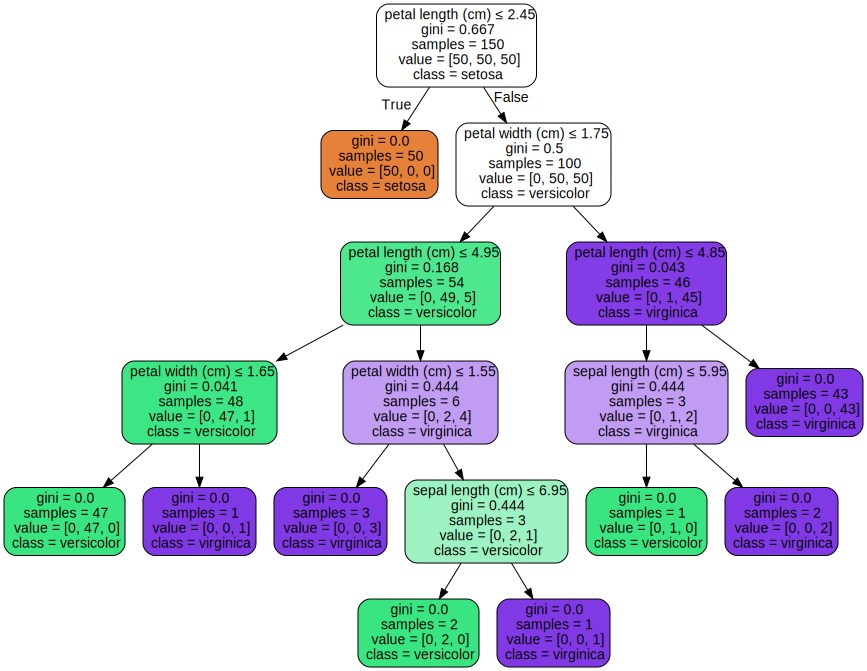

In [5]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  
                      class_names=iris.target_names, filled=True,
                                rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph 

## Custom Dataset

In [6]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/cognibot-official/data/master/train_data.csv")

In [7]:
df_raw.head()

,cement,blast,flyash,water,sp,ca,fa,age,strength
0,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7,24.00
1,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
2,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
3,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
4,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70


In [8]:
df_raw.shape

(721, 9)


## Training, validation and testing

Underfitting occurs if the model or algorithm shows low variance but high bias (to contrast the opposite, overfitting from high variance and low bias). How do we make sure we don't under-fit or over-fit a model?

We use a seperate dataset called the validation dataset. Typical split of Train, validation and test dataset is 60:20:20.

Step 1: Fit our model on the train dataset using a set of hyperparameters

Step 2: Measure the score of our model on validation set

Step 3: If score on validation set is better than training set - we under-fit our training dataset. If score on validation set is worse than training set - we are overfitting

Step 4: Tune our hyperparameters such that the score is almost the same on both train and validation dataset.

**Note:** Never look into the test dataset. It might make you biased towards a particular idea. We assume that the test dataset follows the distribution of the train dataset. This might not be true especially in timeseries data, but there are other ways of dealing with it.


In [9]:
# Scoring function, we use rmse

def score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

In [10]:
# Extract the target variable from train dataset

y = df_raw['strength']
df_raw.drop('strength', axis=1, inplace=True)

In [11]:
# Split train data into train and validation data

X_train, X_valid, y_train, y_valid = train_test_split(df_raw, y, test_size=0.3, shuffle=True)

## Fitting the model

In [12]:
## See source of function

??DecisionTreeRegressor

In [13]:
model1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

In [14]:
%time model1.fit(X_train, y_train)

CPU times: user 5.09 ms, sys: 2.1 ms, total: 7.19 ms
Wall time: 13.7 ms


DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

In [15]:
score(y_train, model1.predict(X_train))

5.869811052249917

In [16]:
score(y_valid, model1.predict(X_valid))

8.895194014971352

![Image](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [ ]:
# # Underfitting - increase max_depth and decrease min_samples_leaf
# list_max_dep = [10, 20, 30, 40]
# list_min_samples = [1, 3, 5, 10]
# # list_min_samples = np.arange(1,20)
# for x,y in zip(list_max_dep, list_min_samples):
#     model2 = DecisionTreeRegressor(max_depth=x, min_samples_leaf=y, random_state=42)
#     #cal score for train and valid
#     #append it to two list train and valid
#     #plot both and see intersection point

In [25]:
model2 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=12, random_state=42)

In [26]:
%time model2.fit(X_train, y_train)

CPU times: user 7.2 ms, sys: 550 µs, total: 7.75 ms
Wall time: 8.7 ms


DecisionTreeRegressor(max_depth=7, min_samples_leaf=12, random_state=42)

In [27]:
score(y_train, model2.predict(X_train))

6.299124598388759

In [28]:
score(y_valid, model2.predict(X_valid))

9.280292953276504

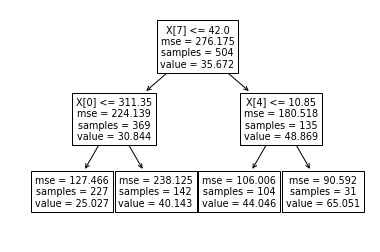

In [30]:
## Plotting a tree
# If you don't get the plot, run this cell again

model1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10, random_state=42)

tree.plot_tree(model1.fit(X_train, y_train));

In [32]:
clf.predict(np.array([35.4, 25.2, 25, 14]).reshape(-1, 1))

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 1 